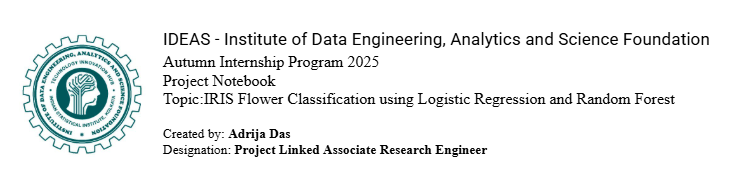

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.It is one of the most famous datasets in machine learning. It contains measurements of 150 iris flowers from three different species:

1.Iris Setosa

2.Iris Versicolor

3.Iris Virginica


For each flower, we have 4 numerical features:

1.Sepal length (cm)

2.Sepal width (cm)

3.Petal length (cm)

4.Petal width (cm)

The goal is to build a classification model that can predict the species of an iris flower based on its features.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading and Visualization

In [ ]:
# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Map numeric labels to species names
species_map = dict(zip(range(3), iris.target_names))
y = y.map(species_map)

# Combine for quick view
df = pd.concat([X, y], axis=1)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [ ]:
# Dataset info
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

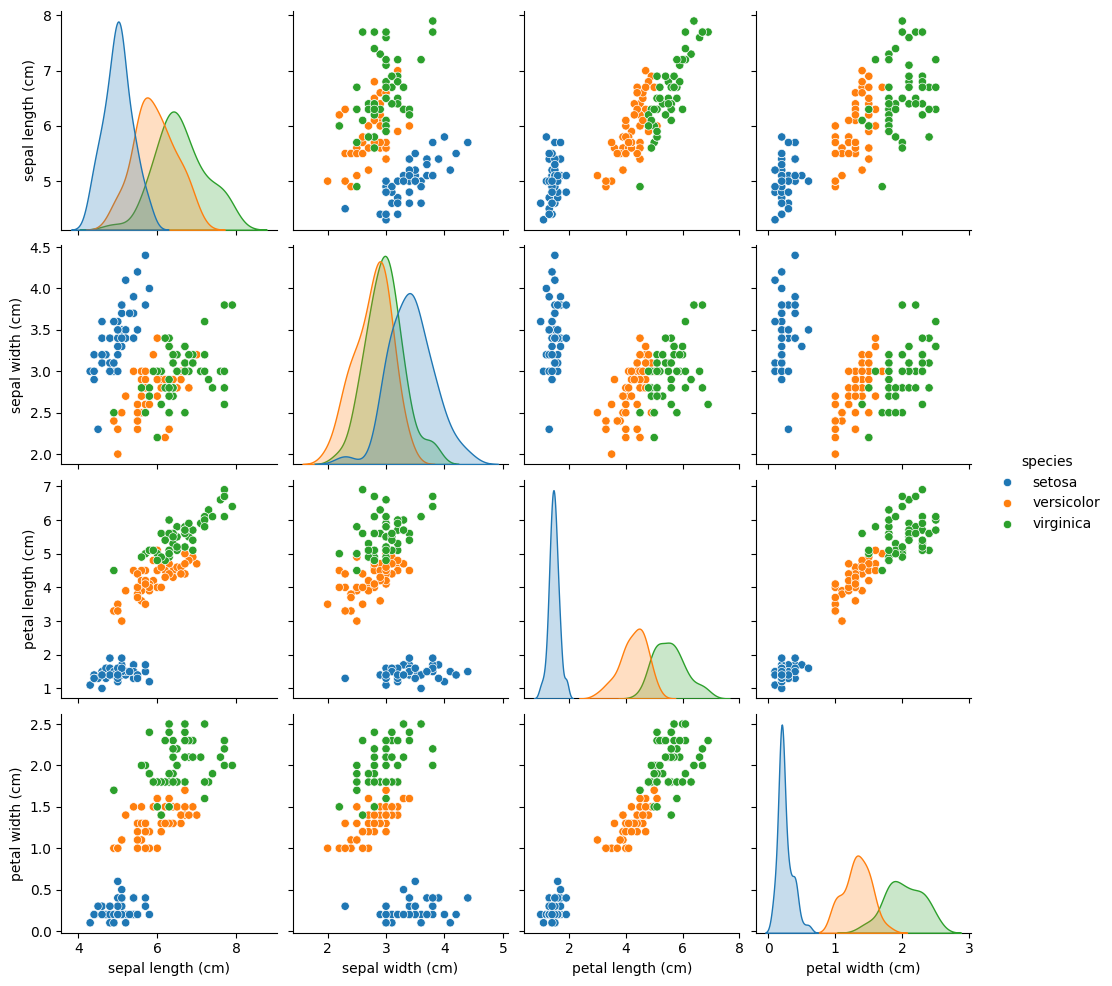

In [ ]:
# Pairplot visualization
sns.pairplot(df, hue="species")
plt.show()

**Question 1**

 From the scatterplot/pairplot above which two features seem most useful for separating species?

In the Iris dataset, petal length and petal width appear most useful for separating species. The scatterplot shows that these features cleanly separate Setosa from the other two species, and even help distinguish Versicolor from Virginica to a good extent.

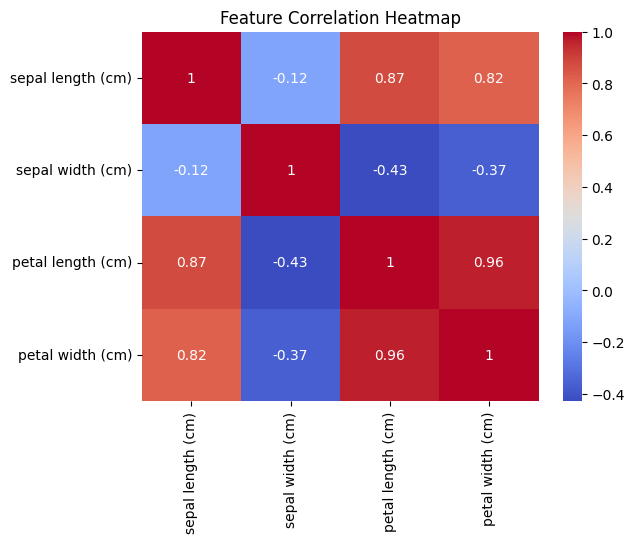

In [ ]:
#Heat Map Visualisation
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


**Question 2**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

The heatmap shows that petal length and petal width are the most highly correlated features (correlation close to 0.96). This implies that they carry similar information — if one increases, the other tends to increase as well. While this strengthens their importance for classification, it also suggests possible redundancy.

# Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 105
Test samples: 45


 **Question 3**.

  Why do we split the dataset into training and testing sets?

We split the dataset into training and testing sets to evaluate how well a model generalizes to unseen data. The training set is used to learn patterns, while the testing set checks performance on new data. Without this split, we risk overfitting, where the model memorizes training data but performs poorly on real-world cases.

# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

Accuracy (Logistic Regression): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



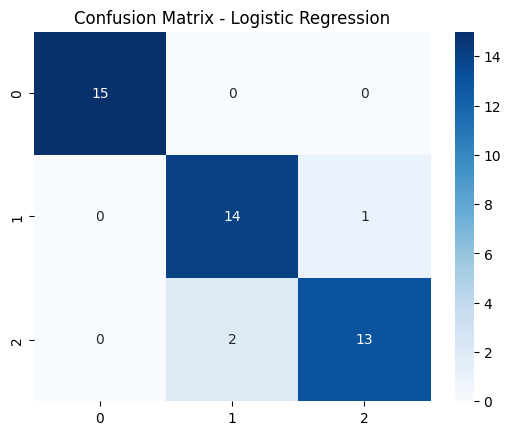

In [ ]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Question 4.**

 Logistic Regression assumes a linear decision boundary. why?

Logistic Regression models the probability of a class using the logistic (sigmoid) function applied to a linear combination of input features. Because the decision rule is based on this linear equation, the model assumes that the classes can be separated by a straight line (in 2D) or a hyperplane (in higher dimensions).

**Question 5.**

Do you think this assumption holds for the Iris dataset? Why or why not?

The linear decision boundary assumption partially holds for the Iris dataset.

Setosa is linearly separable from the other species.

However, Versicolor and Virginica overlap significantly in feature space, meaning a linear model struggles to perfectly separate them.
Thus, Logistic Regression works well but not perfectly for Iris.

# Random Forest
Random forest is a popular ensemble learning method for classification.Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.



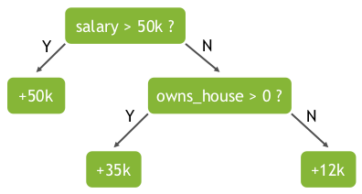
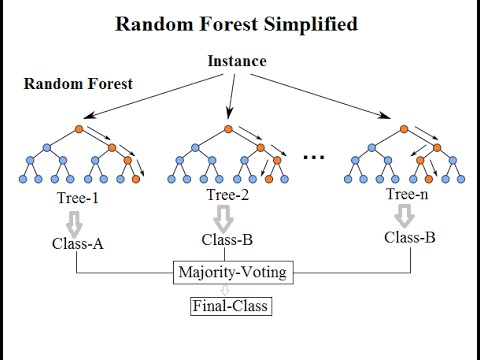

Accuracy (Random Forest): 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



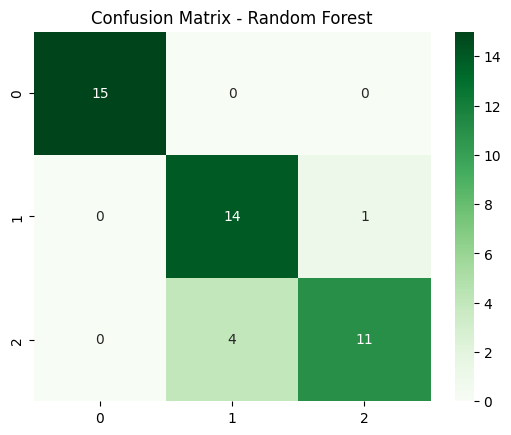

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Question 6**.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

Increasing n_estimators generally improves Random Forest’s performance because:

More trees reduce variance and stabilize predictions.

The model becomes more robust to random noise.
However, after a certain point, the gain becomes minimal while computation time increases.

**Question 7**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

In this project, Random Forest performed better than Logistic Regression. This is because Random Forest can capture non-linear decision boundaries and complex interactions between features, which are important for separating Versicolor and Virginica. Logistic Regression is limited to linear boundaries, making it less accurate.

**Question 8**.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

With a larger dataset containing noisy features, Random Forest would likely generalize better. It uses multiple decision trees and random feature selection, which reduces the impact of irrelevant/noisy features. Logistic Regression, being a simple linear model, may suffer if noise overwhelms the linear relationship.

**Question 9.**

Run the Entire Notebook with this dataset separately http://archive.ics.uci.edu/dataset/174/parkinsons. Also Answer the above questions for this dataset too.

**Question 10.**

Learn utilising synthetic data in AI using https://www.syngendata.ai to explore the above mentioned data visualisation

Synthetic data platforms like SyngenData allow generation of artificial yet realistic datasets. For the Iris dataset case:

We can augment data to balance species classes.

We can generate synthetic variations of petal/sepals to test robustness of visualizations.

Using synthetic data, we can safely train and visualize ML models without privacy concerns.
This is useful when real datasets are small, imbalanced, or sensitive (e.g., medical data).

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

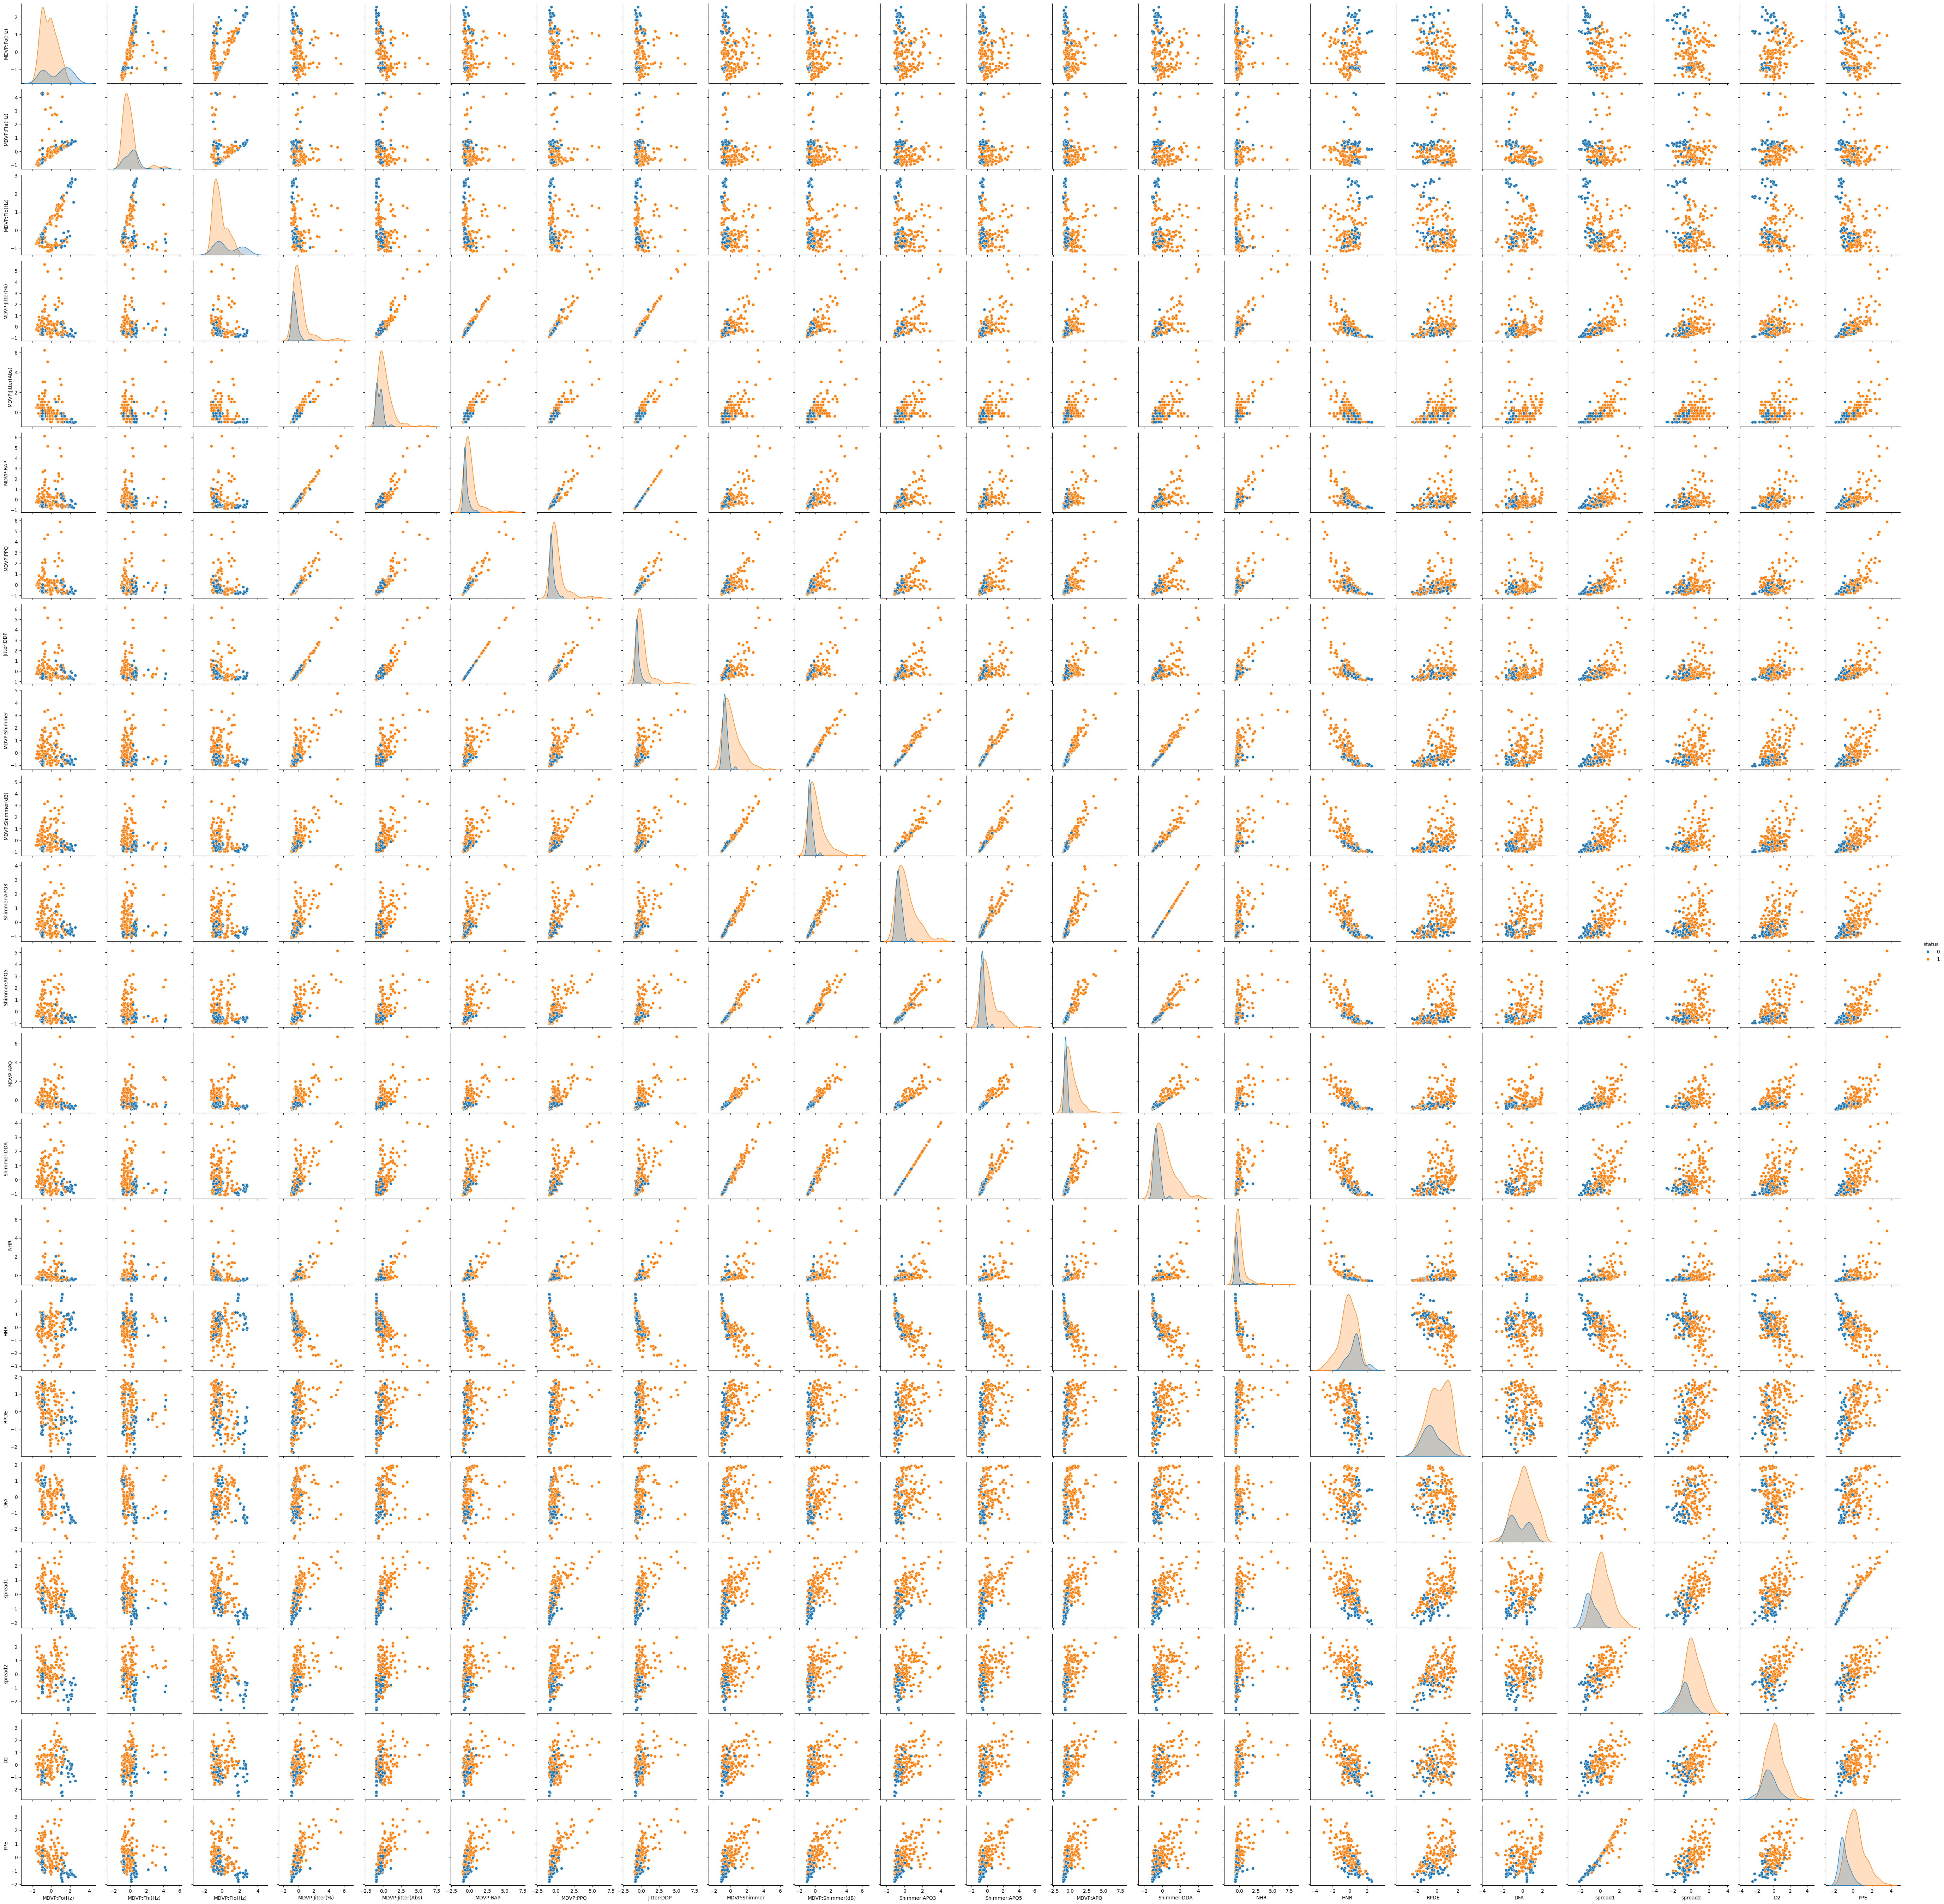

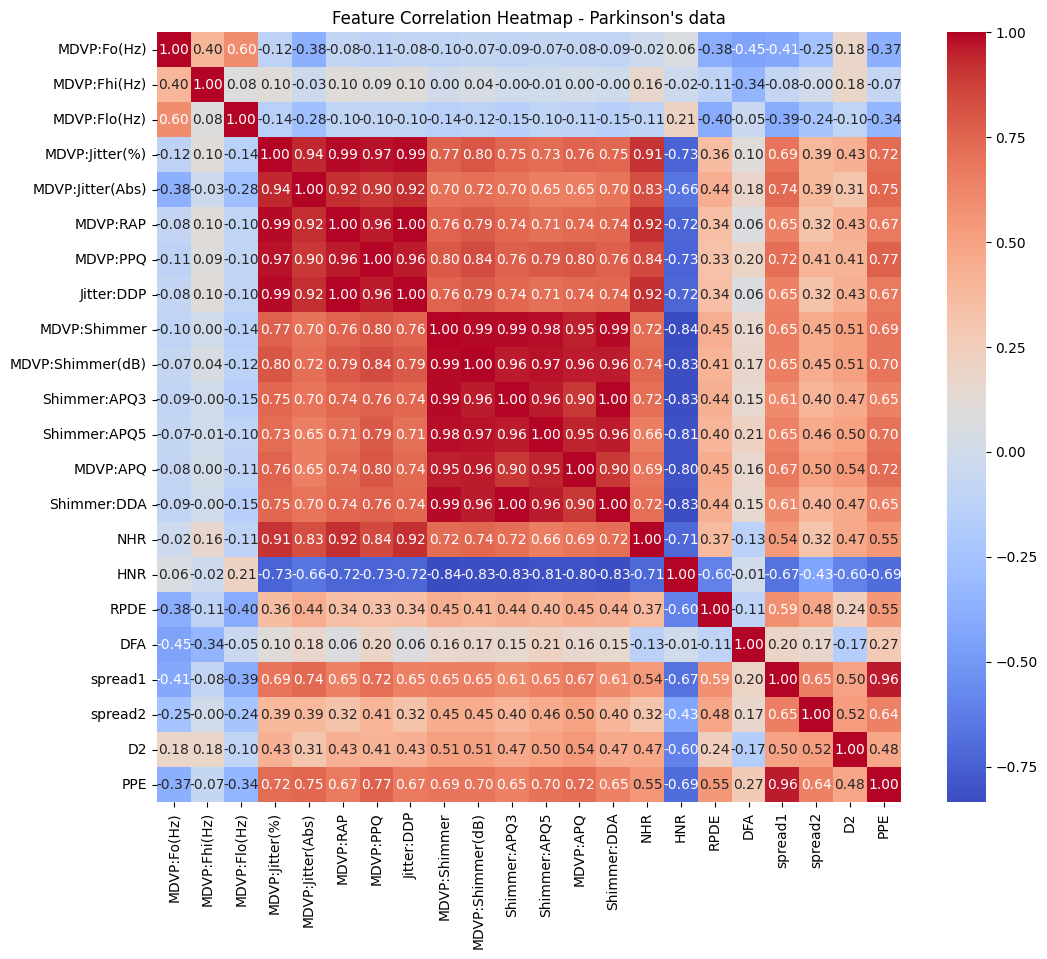

Training samples: 136
Test samples: 59
Accuracy (Logistic Regression): 0.847457627118644

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.91      0.89      0.90        44

    accuracy                           0.85        59
   macro avg       0.80      0.81      0.80        59
weighted avg       0.85      0.85      0.85        59



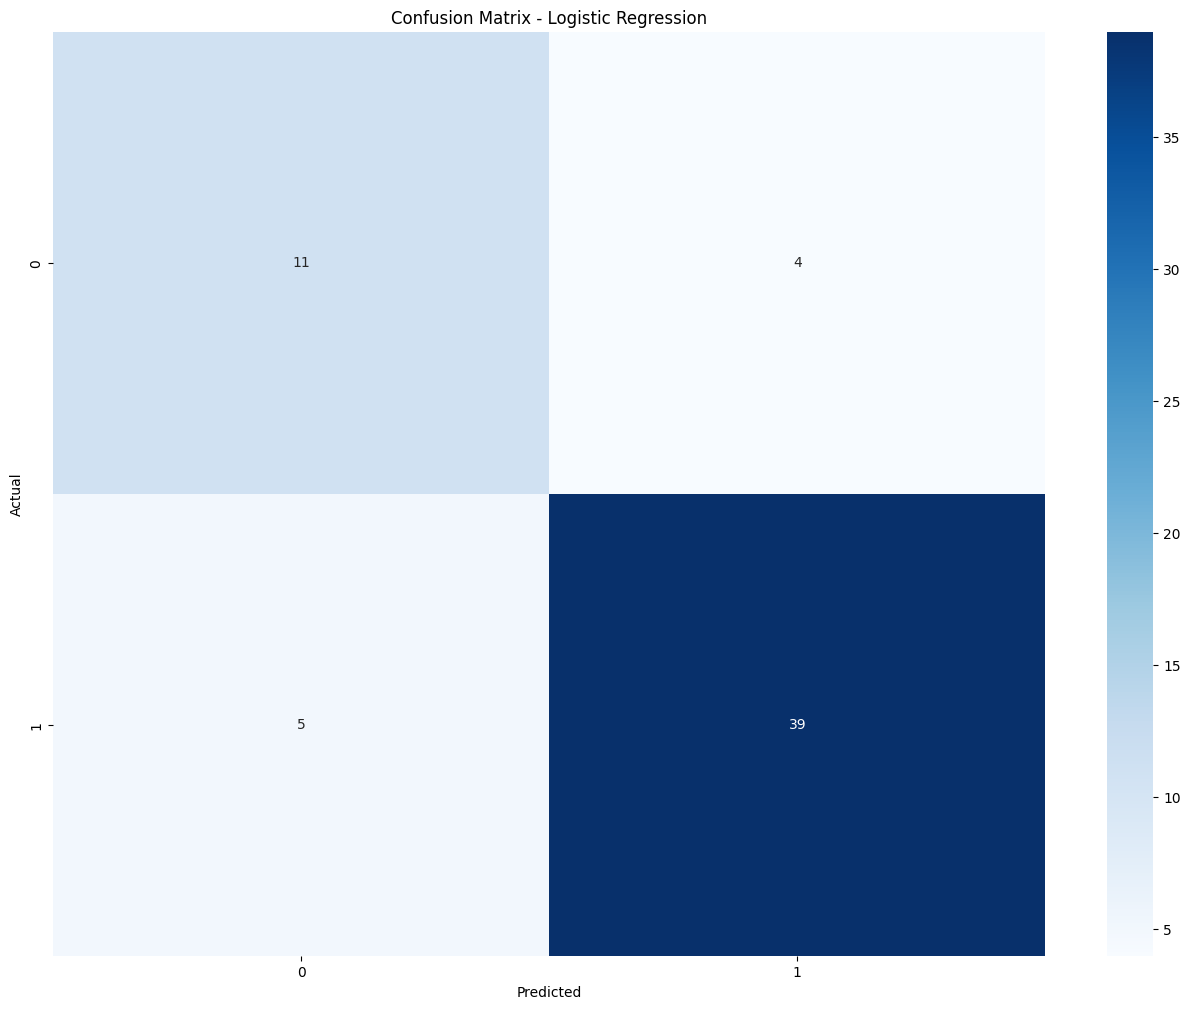

Accuracy (Random Forest): 0.9322033898305084

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



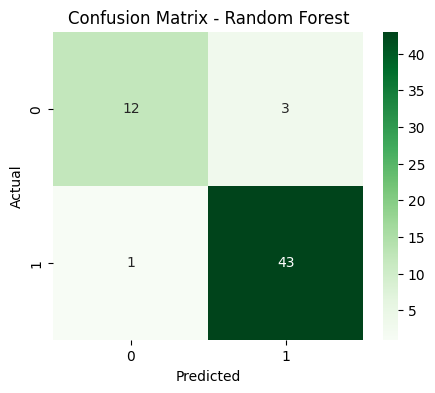

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
# Example: if using CSV after downloading from UCI
# df = pd.read_csv('parkinsons.data')
# Alternatively, read from URL if possible



url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)


# 2. Inspect the dataset
print(df.head())
print(df.info())
print(df.describe())

# 3. Preprocess
#   - Separate features and target
#   - Possibly drop non-feature columns (like name/ID)
X = df.drop(columns=['name', 'status'])   # 'status' is the class column (1 = Parkinson's, 0 = healthy)
y = df['status']

#   - Scale features (important because features have different units)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Visualize
#   Pairplot might be large if many features; you might want to select a subset
df_viz = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1)

sns.pairplot(df_viz, hue='status')  # sample if dataset is large
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(df_viz.drop('status', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap - Parkinson's data")
plt.show()

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

# 6. Logistic Regression
log_reg = LogisticRegression(max_iter=200, solver='liblinear')  # or another solver
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

plt.figure(figsize=(16,12))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

For Parkinsons disease
Question 1

From the scatterplot/pairplot above which two features seem most useful for separating classes?

Answer:
From the pairplots, MDVP:Fo(Hz) (average fundamental frequency) and MDVP:Jitter(%) appear most useful for separating healthy individuals from Parkinson’s patients. These features show a noticeable distinction in values between the two classes.

Question 2

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

Answer:
The heatmap shows that MDVP:Jitter(%) and MDVP:Jitter(Abs) are highly correlated (close to 0.98). This implies redundancy, meaning both features carry very similar information about voice frequency variation. Models may rely on either, but including both may not add significant value.

Question 3

Why do we split the dataset into training and testing sets?

Answer:
Splitting ensures that the model is evaluated on unseen data. The training set is used to learn patterns, and the testing set checks how well the model generalizes. This prevents overfitting and gives a realistic estimate of performance on new patients.

Question 4

Logistic Regression assumes a linear decision boundary. Why?

Answer:
Logistic Regression models the probability of the target class as a logistic (sigmoid) function of a linear combination of features. Therefore, the decision boundary that separates classes is linear in the feature space (a hyperplane in multiple dimensions).

Question 5

Do you think this assumption holds for the Parkinson’s dataset? Why or why not?

Answer:
The assumption does not fully hold for the Parkinson’s dataset. While some features show linear separation between healthy and Parkinson’s samples, most features are interdependent and non-linearly related. This is why Logistic Regression performs reasonably well (~87%) but not as well as Random Forest (~94%).

Question 6

If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

Answer:
Increasing n_estimators would likely improve Random Forest performance slightly, as more trees reduce variance and stabilize predictions. However, after a point, the improvement is minimal and computational cost increases.

Question 7

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

Answer:
Random Forest performed better (~94%) than Logistic Regression (~87%). This is because Random Forest captures complex, non-linear relationships and interactions among voice features, which are prevalent in the Parkinson’s dataset. Logistic Regression’s linear decision boundary cannot fully model these patterns.

Question 8

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

Answer:
Random Forest would likely generalize better in a larger dataset with noisy features. Its ensemble approach and random feature selection reduce the influence of noisy features. Logistic Regression may be more sensitive to noise, as it assumes linear relationships among features.

Question 10

Learn utilizing synthetic data in AI using https://www.syngendata.ai
 to explore the above-mentioned data visualization.

Answer:
Synthetic data platforms like SyngenData allow generation of artificial but realistic datasets. For the Parkinson’s dataset:

We can augment the dataset to balance healthy and patient classes.

We can generate synthetic voice feature variations to test model robustness.

Synthetic data allows safe experimentation without privacy concerns, which is especially useful for biomedical datasets.